In [7]:
# Code for combining two data sources into one that we will use

import pandas as pd
import numpy as np

In [8]:
temp_avgs = pd.read_csv("monthly-average-surface-temperatures-by-year.csv")
sf_temp_avgs = pd.read_csv("SF_anomaly_temps.csv")
co2_avgs = pd.read_csv("CO2_Yearly_Avgs.csv")
world_temp_avgs = temp_avgs[temp_avgs["Entity"] == "World"]
co2_avgs

,Unnamed: 0,Year,Month,Year_Decimal,CO2
0,NaN,1958,3,1958.2027,315.71
1,NaN,1958,4,1958.2877,317.45
2,NaN,1958,5,1958.3699,317.51
3,NaN,1958,6,1958.4548,317.27
4,NaN,1958,7,1958.5370,315.87
...,...,...,...,...,...
789,NaN,2023,12,2023.9583,421.86
790,NaN,2024,1,2024.0417,422.80
791,NaN,2024,2,2024.1250,424.62
792,NaN,2024,3,2024.2083,425.38


In [15]:
def get_temp_avg(year, month):
    return world_temp_avgs[world_temp_avgs["Year"] == month].iloc[0][str(year)]

def get_sf_temp(year, month):
    sf_absolute_temps = [8.47, 10.72, 11.87, 13.43, 16.00, 18.41, 19.79, 19.75, 19.49, 16.68, 12.34, 8.78]
    year_data =  sf_temp_avgs[sf_temp_avgs["Year"] == year]
    return year_data[year_data["Month"] == month].iloc[0]["Monthly Anomaly"] + sf_absolute_temps[month-1]

get_sf_temp(1950, 1)

6.460000000000001

In [29]:
temp_avgs_list = []
trunc_co2_avgs = co2_avgs[co2_avgs["Year"] < 2020]
for row in trunc_co2_avgs.iterrows():
    year = int(row[1]['Year'])
    month = int(row[1]['Month'])
    #print("{} {}".format(year, month))
    temp_avg = get_temp_avg(year, month)
    temp_avgs_list.append(temp_avg)
trunc_co2_avgs.insert(5, "Temperature", temp_avgs_list)
full_df = trunc_co2_avgs.drop(["Unnamed: 0"], axis=1)
full_df

,Year,Month,Year_Decimal,CO2,Temperature
0,1958,3,1958.2027,315.71,12.874486
1,1958,4,1958.2877,317.45,13.822359
2,1958,5,1958.3699,317.51,14.834965
3,1958,6,1958.4548,317.27,15.442329
4,1958,7,1958.5370,315.87,15.743765
...,...,...,...,...,...
737,2019,8,2019.6250,410.17,16.467312
738,2019,9,2019.7083,408.76,15.824982
739,2019,10,2019.7917,408.74,14.899426
740,2019,11,2019.8750,410.47,13.775260


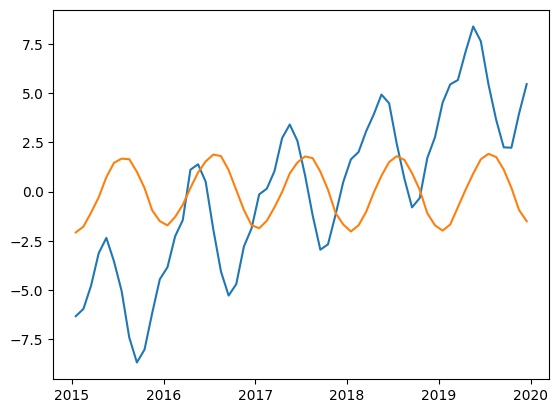

In [30]:
import matplotlib.pyplot as plt
partial_df = full_df[full_df["Year"] >= 2015]
jan_data = partial_df[partial_df["Month"] == 3]
seasonal_df = partial_df[partial_df["Month"].isin([4])]
plt.plot(partial_df["Year_Decimal"], partial_df["CO2"] - np.average(partial_df["CO2"]))
plt.plot(partial_df["Year_Decimal"], partial_df["Temperature"] - np.average(partial_df["Temperature"]))
partial_df.to_csv("co2_and_temp.csv")

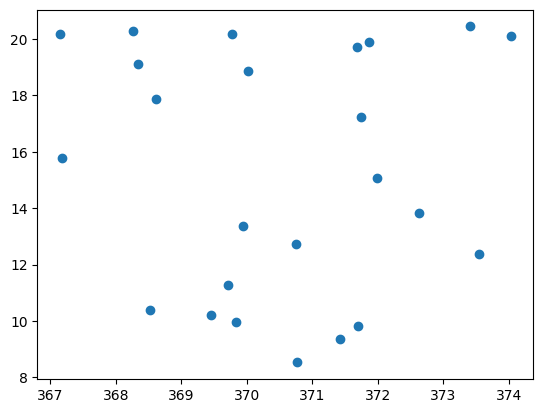

In [50]:
y = 2000
partial_df = full_df[full_df["Year"] >= y]
partial_df = partial_df[partial_df["Year"] < y + 2]
jan_data = partial_df[partial_df["Month"] == 3]
seasonal_df = partial_df[partial_df["Month"].isin([5])]
plt.scatter(partial_df["CO2"], partial_df["Temperature"])
#plt.scatter(partial_df["CO2"], partial_df["CO2"])

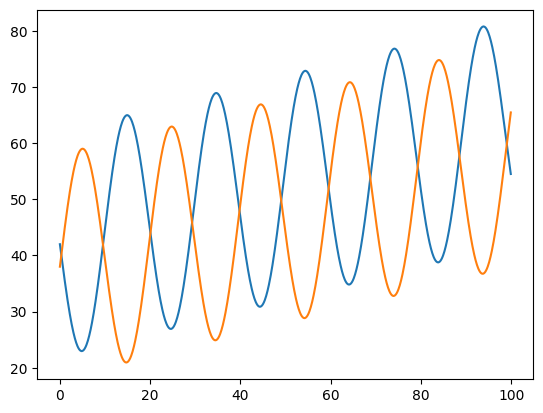

In [64]:
import math
temperatures = []
co2s = []
times = []
ss_temperatures = []
ss_co2s = []
ss_times = []
for i in range(1000):
    x = i/10
    if x % 100 == 0:
        ss_times.append(x)
        ss_temperatures.append(38 + (.2 * x) + 20 * np.sin(2 * x / (2 * math.pi)))
        ss_co2s.append(42 + (.2 * x)  - 20 * np.sin(2 * x / (2 * math.pi)))
    times.append(x)
    temperatures.append(38 + (.2 * x) + 20 * np.sin(2 * x / (2 * math.pi)))
    co2s.append(42 + (.2 * x) - 20 * np.sin(2 * x / (2 * math.pi)))
plt.plot(times, co2s)
plt.plot(times, temperatures)